In [3]:
import gym
import random
import torch
import numpy as np
from collections import deque
import matplotlib.pyplot as plt
from agents.q_learner import Q_learner

%matplotlib inline

In [63]:
x = torch.randn(10)
print((x+300)/2)
y = torch.randn(4,3)
print(y)
print(y[:,1][1])
print(y[:,1][1] +y)

tensor([150.0113, 149.9700, 151.8809, 150.0035, 150.7585, 149.8925, 150.2532,
        149.5263, 149.3126, 149.4763])
tensor([[-0.0973,  0.7963,  0.3416],
        [-1.2361, -0.6552, -2.2615],
        [ 1.1132, -0.0305, -0.4524],
        [-0.3548,  1.4792, -0.7370]])
tensor(-0.6552)
tensor([[-0.7525,  0.1411, -0.3137],
        [-1.8913, -1.3105, -2.9167],
        [ 0.4580, -0.6857, -1.1076],
        [-1.0100,  0.8239, -1.3922]])


In [2]:
args = dict()
args["BUFFER_SIZE"] = int(500)  # replay buffer size
args["BATCH_SIZE"] = 32  # minibatch size
args["GAMMA"] = 0.95  # discount factor
args["TAU"] = 1e-3  # for soft update of target parameters
args["LR"] = 0.001  # learning rate
args["UPDATE_EVERY"] = 4  # how often to update the network

In [5]:
env = gym.make('CartPole-v1')
env.seed(0)
agent = Q_learner(state_size=env.observation_space.shape[0], action_size= env.action_space.n, seed=0, hiddens = [24,24], args = args)


Episode 100	Average Score: 18.67
Episode 200	Average Score: 13.42
Episode 300	Average Score: 11.40
Episode 400	Average Score: 10.34
Episode 500	Average Score: 10.19
Episode 600	Average Score: 9.690
Episode 700	Average Score: 10.18
Episode 800	Average Score: 9.435
Episode 900	Average Score: 9.39
Episode 1000	Average Score: 9.37
Episode 1100	Average Score: 9.39
Episode 1200	Average Score: 9.50
Episode 1300	Average Score: 17.33
Episode 1400	Average Score: 66.28
Episode 1500	Average Score: 52.31
Episode 1600	Average Score: 25.60
Episode 1700	Average Score: 26.67
Episode 1800	Average Score: 37.34
Episode 1900	Average Score: 152.93
Episode 1921	Average Score: 202.30
Environment solved in 1821 episodes!	Average Score: 202.30


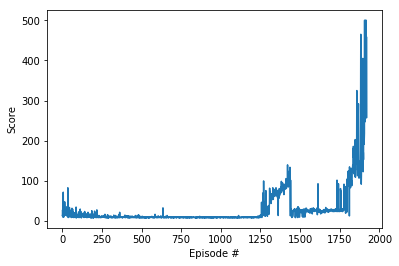

In [6]:
def dqn(n_episodes=10000, max_t=1000, eps_start=1, eps_end=0.01, eps_decay=0.995):

    scores = []                        # list containing scores from each episode
    scores_window = deque(maxlen=100)  # last 100 scores
    eps = eps_start                    # initialize epsilon
    for i_episode in range(1, n_episodes+1):
        state = env.reset()
        score = 0
        for t in range(max_t):
            action = agent.act(state, eps)
            next_state, reward, done, _ = env.step(action)
            agent.step(state, action, reward, next_state, done)
            state = next_state
            score += reward
            if done:
                break 
        scores_window.append(score)       # save most recent score
        scores.append(score)              # save most recent score
        eps = max(eps_end, eps_decay*eps) # decrease epsilon
        
        print('\rEpisode {}\tAverage Score: {:.2f}'.format(i_episode, np.mean(scores_window)), end="")
        if i_episode % 100 == 0:
            print('\rEpisode {}\tAverage Score: {:.2f}'.format(i_episode, np.mean(scores_window)))
        if np.mean(scores_window)>=200.0:
            print('\nEnvironment solved in {:d} episodes!\tAverage Score: {:.2f}'.format(i_episode-100, np.mean(scores_window)))
            torch.save(agent.qnetwork_local.state_dict(), 'models/checkpoints/checkpoint.pth')
            break
    return scores

scores = dqn()

# plot the scores
fig = plt.figure()
ax = fig.add_subplot(111)
plt.plot(np.arange(len(scores)), scores)
plt.ylabel('Score')
plt.xlabel('Episode #')
plt.show()
